In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, normalize_data, prepare_sequences, prepare_tensors
import matplotlib.pyplot as plt
from utils.chart import plot_chart_line

---

## For **prepare_data** function

In [3]:
data = prepare_data()
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [4]:
data.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

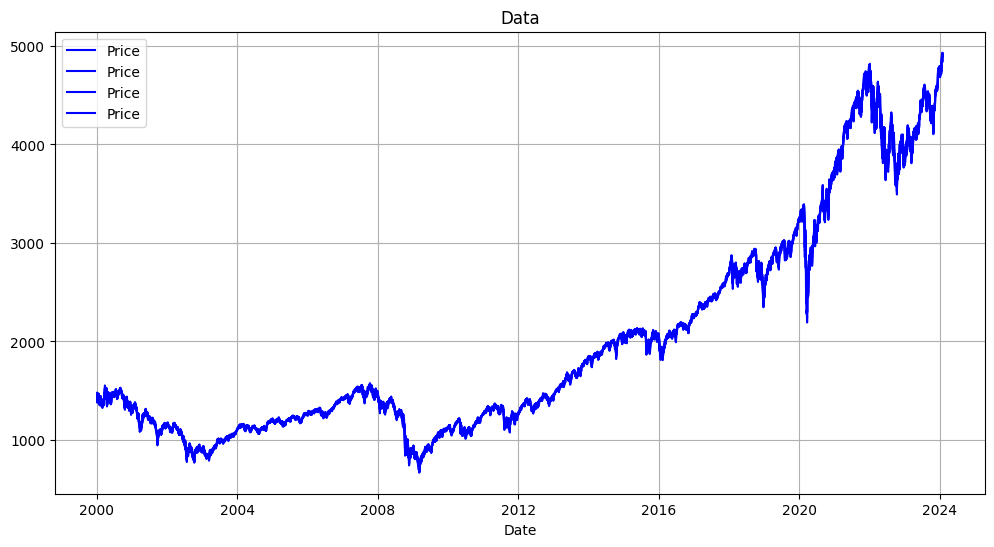

In [5]:
plot_chart_line(data, label='Price', title='Data')

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Open,High,Low,Close
Date,,,,
2000-01-03,0.186024,0.184788,0.181568,0.183161
2000-01-04,0.182720,0.179410,0.171936,0.170036
2000-01-05,0.169580,0.169507,0.167289,0.170668
2000-01-06,0.170213,0.169183,0.170682,0.170984
2000-01-07,0.170529,0.176164,0.172713,0.179927
...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057
2024-01-26,0.991292,0.994240,0.991811,0.991306
2024-01-29,0.992243,0.999580,0.993206,1.000000


<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

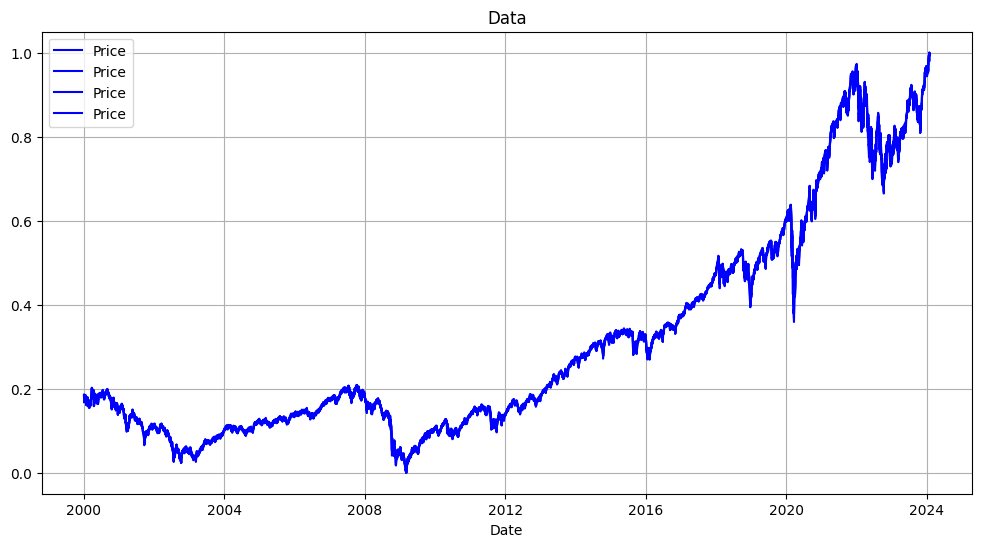

In [7]:
plot_chart_line(normalized_data, label='Price', title='Data')

----

## For **prepare_sequences** function

In [8]:
x, y = prepare_sequences(normalized_data)

In [9]:
x.shape

(6053,)

In [10]:
x[0]

0.18372063776093983

In [11]:
x

array([0.18372064, 0.17924213, 0.1777579 , ..., 1.        , 0.99930377,
       0.98064631])

In [12]:
y.shape

(6053, 20)

In [13]:
y[0]

array([0.18602366, 0.18478831, 0.1815681 , 0.18316082, 0.18271985,
       0.17941036, 0.17193635, 0.17003575, 0.16957997, 0.16950674,
       0.16728872, 0.17066847, 0.1702134 , 0.16918331, 0.17068206,
       0.17098365, 0.17052894, 0.17616423, 0.1727129 , 0.17992659])

In [14]:
y

array([[0.18602366, 0.18478831, 0.1815681 , ..., 0.17616423, 0.1727129 ,
        0.17992659],
       [0.18271985, 0.17941036, 0.17193635, ..., 0.18156815, 0.18229995,
        0.18372064],
       [0.16957997, 0.16950674, 0.16728872, ..., 0.18022249, 0.18064094,
        0.17924213],
       ...,
       [0.98293457, 0.98520247, 0.98300493, ..., 0.99423963, 0.99181081,
        0.9913064 ],
       [0.98373047, 0.98474679, 0.98308031, ..., 0.99957983, 0.9932062 ,
        1.        ],
       [0.99120944, 0.99352908, 0.98815618, ..., 1.        , 1.        ,
        0.99930377]])

---

## For **prepare_tensors** function

In [15]:
X_train, X_test, y_train, y_test = prepare_tensors(x, y)

[0.90170529 0.20143482 0.3420732  ... 0.66031894 0.84175089 0.07861174]


In [16]:
print('X_train:', X_train.shape)
print(X_train[0])

X_train: (4842, 1, 1)
tf.Tensor([[0.90170527]], shape=(1, 1), dtype=float32)


In [17]:
print('X_test:',X_test.shape)
print(X_test[0])

X_test: (1211, 1, 1)
tf.Tensor([[0.1659853]], shape=(1, 1), dtype=float32)


In [18]:
print('y_train:', y_train.shape)
print(y_train[0])

y_train: (4842, 20)
tf.Tensor(
[0.881489   0.8799595  0.8749917  0.87854815 0.8772315  0.88415474
 0.877898   0.8755751  0.87480366 0.877594   0.8761378  0.8780636
 0.87982404 0.88492197 0.8805007  0.8850566  0.8921021  0.8954748
 0.8933893  0.8927953 ], shape=(20,), dtype=float32)


In [19]:
print('y_test:',y_test.shape)
print(y_test[0])

y_test: (1211, 20)
tf.Tensor(
[0.170496   0.16894487 0.17287529 0.17216444 0.17171106 0.17165744
 0.17359065 0.1746507  0.17418598 0.17085949 0.1736283  0.17331937
 0.17279899 0.16946423 0.17115034 0.16992754 0.16943161 0.16675165
 0.17087504 0.16972055], shape=(20,), dtype=float32)
